# **Multi-Layer Perceptron Demo**

In order to perform gradient descent across a neural network, one needs to keep track of all the values in the nodes, and all of the partial derrivatives. For this reason a `Value` class is created, which takes on a tree structure. 

The visualize this tree structure `graphviz` is used. In addition to installing the python package graphviz, the standalone software of graphviz also needs to be installed:

```
brew install graphviz
```

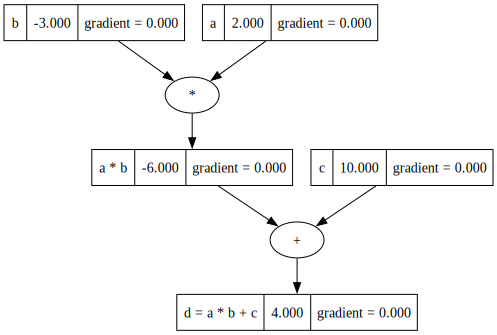

In [1]:
from visualization import draw_diagram
from value import Value 


a = Value(2, 'a')
b = Value(-3, 'b')
c = Value(10, 'c')

d = a*b + c; d.symbol='d'
draw_diagram(d, 'TB')

The gradient $∇$ of each value is simply the partial derrivative of that value with respect to the total/final value. For example the gradient of $c$ is the partial derrivative of $d$ with respect to $c$

$$ ∇_c  = \frac{\partial d}{\partial c} $$

For values further down the tree the chain rule can be used. In the case of finding the gradient of $a$, the product of $a$ and $b$ can be considered as a `Value` $ab$

$$ \frac{\partial d}{\partial a} = \frac{\partial d}{\partial ab} \frac{\partial ab}{\partial a}$$

The chain rule always depends on the current operation and the operation that follows the current operation, which means one can start at the final value $d$ and fill in the gradient values going back down the tree


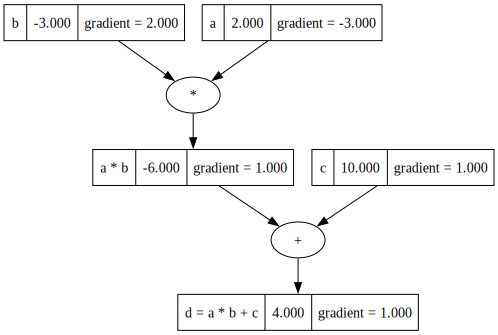

In [2]:
d.back_propogate()
draw_diagram(d, 'TB')


The `Value` class is used inside the `MLP` (multi-layer perceptron) class. This neural network can be be trained using training data `x_train` and `y_train`, after which it is able to predict any new value in the same shape as the original training data. 

In [3]:
from mlp import MLP

xs = [
    [2.,  3., -1.],
    [3., -1.,  .5],
    [.5,  1.,  1.],
    [1.,  1., -1.],
]

ys = [1., -1., -1., 1.]

network = MLP(xs, ys, hidden_layer_sizes=[4, 4])
network.train(thresehold=0.001)

network.predict(xs)

[Value(0.9847388782575105),
 Value(-0.9999858478087925),
 Value(-0.9999784598948995),
 Value(0.9862509386575095)]

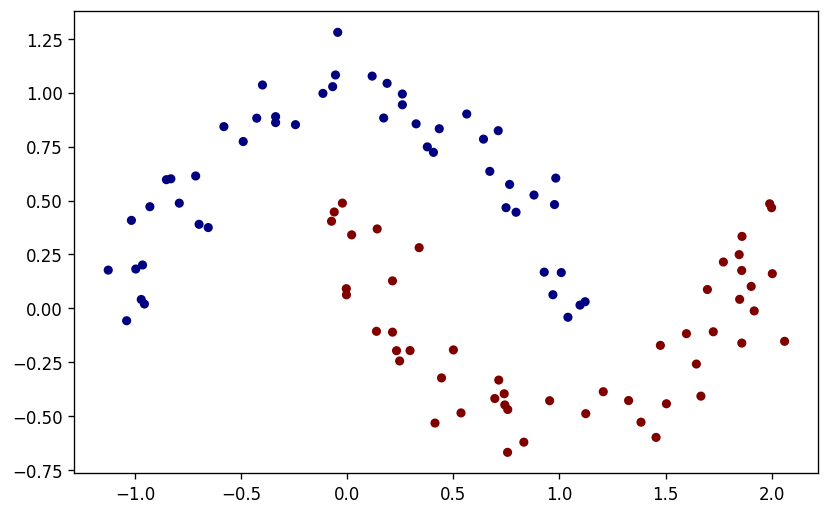

In [4]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = make_moons(n_samples=100, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33,     # proportion of data that goes into the test set
    random_state=42
) 

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(8,5), dpi=120)
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
# 2 layer neural network
model = MLP(X_train, y_train, hidden_layer_sizes=[16, 16])
model.train()

# X_train


AssertionError: inputs and weights are of different sizes